## Velocity structure 1 D

In [1]:
from eqnemix import eqnegrid as eqng
import matplotlib.pyplot as plt
import nllgrid

In [2]:
vp_values = [5.5, 5.85, 6.5, 8.18]  
vs_values = [3.06,3.25, 3.61, 4.54]
layer_thickness = [5, 24, 10, 100]  

In [3]:
eq=eqng(fileextent='extent.shp', inputsrc=4326, outputcrs=3587,
       filesp='Vsp.npy',files='Vs.npy', filep='Vp.npy', deltadist=1000)

### Load the 3D grid using a simple index slicing 

### P Grid

In [4]:
if len(layer_thickness) != len(vp_values):
    raise ValueError("Error in dimension of layer thickness")
z_start = 0

for i, vs in enumerate(vp_values):
    z_end = z_start + layer_thickness[i]
    eq.gridp.array[:, :, z_start:z_end] = vs
    z_start = z_end  
if z_end < eq.nz:
    eq.gridp.array[:, :, z_end:] = vp_values[-1]

### S Grid

In [5]:
if len(layer_thickness) != len(vs_values):
    raise ValueError("Error in dimension of layer thickness")
z_start = 0

for i, vs in enumerate(vs_values):
    z_end = z_start + layer_thickness[i]
    eq.grids.array[:, :, z_start:z_end] = vs
    z_start = z_end  
if z_end < eq.nz:
    eq.grids.array[:, :, z_end:] = vp_values[-1]

## Plot the Grid XYZ

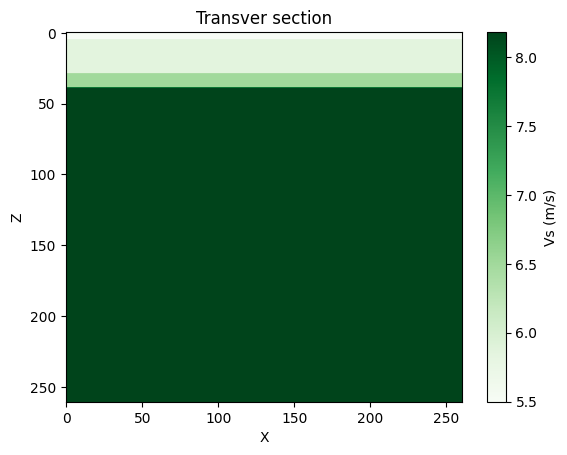

In [6]:
slice_index = eq.ny // 2  
plt.imshow(eq.gridp.array[:, slice_index, :].T, cmap='Greens', origin='upper', aspect='auto')
plt.colorbar(label='Vs (m/s)')
plt.title('Transver section')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

In [7]:
eq.print_variables()

fileextent: extent.shp
inputsrc: 4326
outputcrs: 3587
filesp: Vsp.npy
filep: Vp.npy
files: Vs.npy
deltadist: 1000
inputcrs: EPSG:4326
minx: 4001250.5258963117
miny: -1217183.3701487812
maxx: 4239792.688220768
maxy: -955602.1075079076
length_x: 238542.1623244565
length_y: 261581.26264087367
elements_x: 238
elements_y: 261
max_elements: 261
nx: 261
ny: 261
nz: 261
dx: 1000
dy: 1000
dz: 1000
x_orig: 4001250.5258963117
y_orig: -1217183.3701487812
z_orig: 0
gridp: basename: Vp_grid
nx: 261 ny: 261 nz: 261
x_orig: 4001250.5258963117 y_orig: -1217183.3701487812 z_orig: 0
dx: 1000 dy: 1000 dz: 1000
grid_type: VELOCITY
float_type: FLOAT
transform: TRANSFORM  SIMPLE  LatOrig 0.000000  LongOrig 0.000000  RotCW 0.000000
grids: basename: Vs_grid
nx: 261 ny: 261 nz: 261
x_orig: 4001250.5258963117 y_orig: -1217183.3701487812 z_orig: 0
dx: 1000 dy: 1000 dz: 1000
grid_type: VELOCITY
float_type: FLOAT
transform: TRANSFORM  SIMPLE  LatOrig 0.000000  LongOrig 0.000000  RotCW 0.000000


In [9]:
eq.savefiles(basefile="tx_")